<a href="https://colab.research.google.com/github/johyunkang/python_stat/blob/main/dessa_02_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 (50점)

- 데이터 : 당뇨병 유무와 신체검사 데이터
- 컬럼설명
    - Preganacies : 임신횟수
    - Glucose : 포도당
    - BloodPressure : 혈압
    - SkinThickness : 피부두께
    - Insulin : 2시간 혈청 인슐린
    - BMI : BMI
    - DiabetesPegigreeFunction : 당뇨병 혈통기능
    - Age : 나이
    - Outcome : 당뇨병 유무

### 1. 데이터 탐색
 - (1) 시각화 포함 탐색적 자료분석을 시행하시오 (EDA)
 - (2) 이상치를 식별하고 처리하시오
 - (3) 앞선 두 단계에서 발견한 향후 분석 시에 고려해야 할 사항을 작성하시오.


 ### 2. 클래스불균형 처리
 - (1) 업샘플링 과정을 설명하고 결과를 작성하시오
 - (2) 언더 샘플링 과정을 설명하고 결과를 작성하시오
 - (3) 둘 중 하나를 선택하고 선택한 이유를 서술하시오

 ### 3. 모델링
 - (1) 최소 3개 이상의 알고리즘을 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 선정하시오
 - (2) 모델을 비교하고 결과를 설명하시오
 - (3) 속도 개선을 위한 차원 축소 방법을 설명하고 수행하시오. 그리고 예측 성능과 속도를 비교하고 결과를 작성하시오

In [1]:
print('''
1-1 EDA
''')


1-1 EDA



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
FILE_PATH = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/'
df1 = pd.read_csv(FILE_PATH + 'diabetes_for_test.csv')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(df1.info())
display(df1.describe())
print(df1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


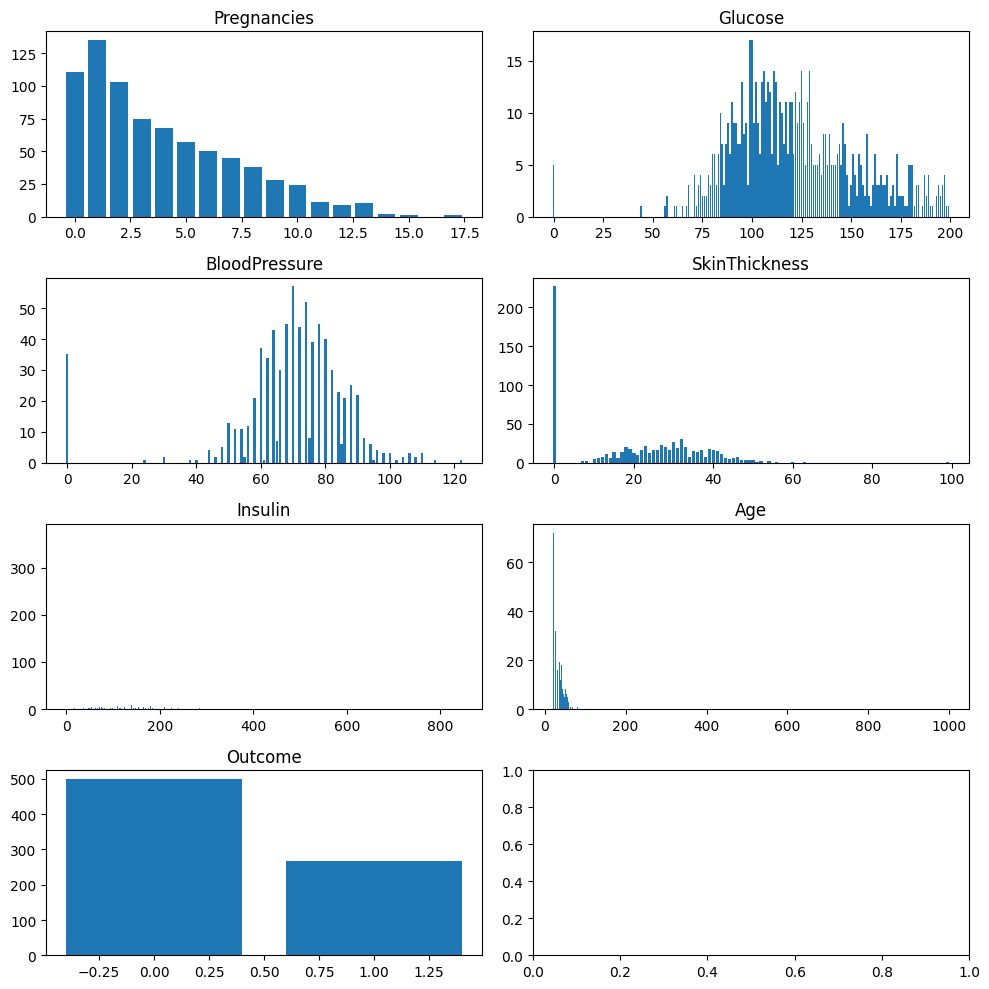

In [19]:
# for i, col in enumerate(df1.select_dtypes(exclude='float').columns) :
#     print('='*20, ', ', col)
#     print(df1[col].value_counts()[:5])
#     print('\n\n')

plt.subplots(4,2, figsize=(10, 10))
for i, col in enumerate(df1.select_dtypes(exclude='float').columns) :
    plt.subplot(4, 2, (i+1))
    plt.title(col)
    plt.bar(df1[col].value_counts().index, df1[col].value_counts().values)

plt.tight_layout()
plt.show()


In [20]:
print('''
당뇨 데이터를 분석하기 위해 당뇨병 유무에 따른 독립변수의 분포를
살펴볼 필요가 있다. 따라서 당뇨병 유무로 그룹화 하였으며 아래와 같이
그룹별 평균데이터를 만들었다.
''')


당뇨 데이터를 분석하기 위해 당뇨병 유무에 따른 독립변수의 분포를
살펴볼 필요가 있다. 따라서 당뇨병 유무로 그룹화 하였으며 아래와 같이
그룹별 평균데이터를 만들었다.



In [23]:
df_grp = df1.groupby(by=['Outcome']).mean()
print(type(df_grp))
df_grp

<class 'pandas.core.frame.DataFrame'>


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,36.934000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [24]:
print('''
위 당뇨 유무에 따른 평균 값을 시각화
''')


위 당뇨 유무에 따른 평균 값을 시각화



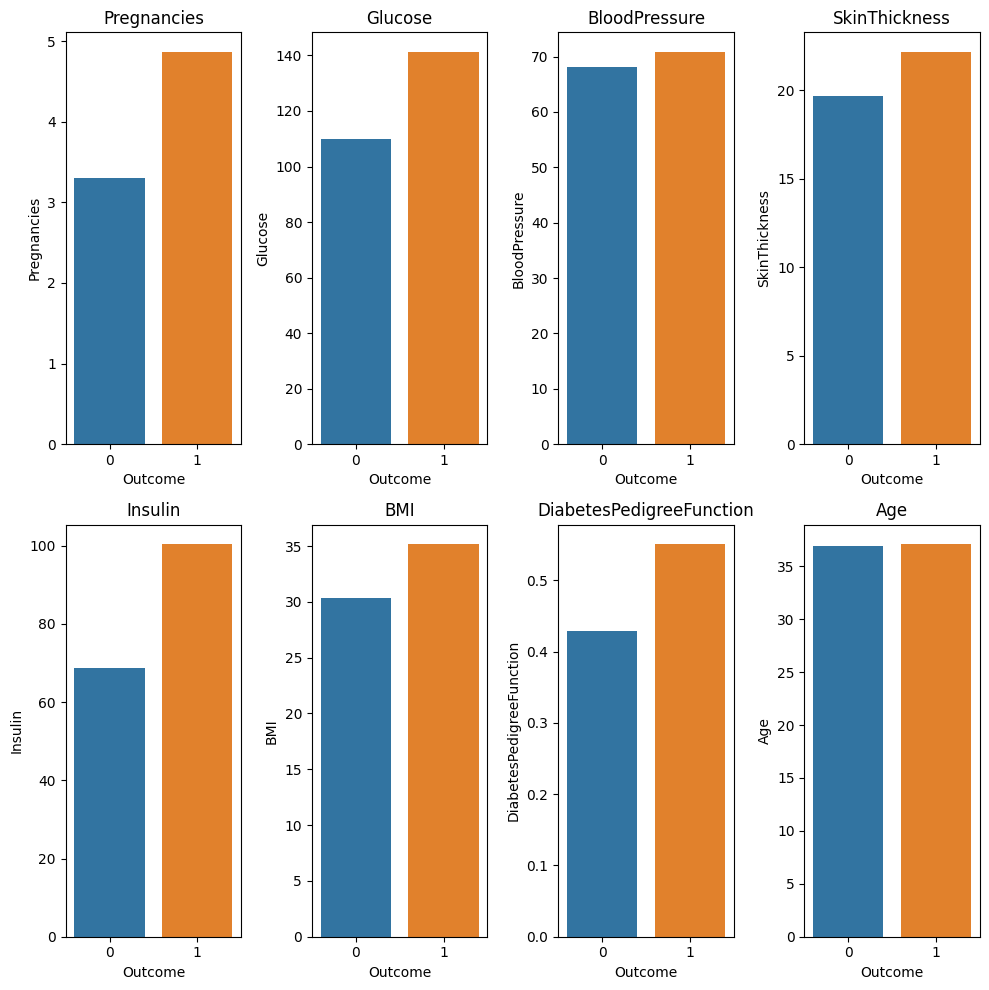

In [38]:
plt.subplots(2, 4, figsize=(10,10))

for i, col in enumerate(df_grp.columns):
    plt.subplot(2, 4, (i+1))
    plt.title(col)
    # plt.bar(df_grp.index, df_grp[col].values)
    sns.barplot(data=df_grp, x=df_grp.index, y=df_grp[col])

plt.tight_layout()
plt.show()